# Optimisation: CMA-ES

This example shows you how to run a global optimisation with [CMA-ES](http://pints.readthedocs.io/en/latest/optimisers/cmaes.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
0: 1346897.98142
1: 1346897.98142
2: 1346897.98142
3: 1346897.98142
20: 1210981.01529
40: 1181765.82567
60: 161061.811785
80: 98209.2421672
100: 98208.771975
120: 98208.7719429
140: 98208.7719429
160: 98208.7719429
180: 98208.7719429
200: 98208.7719429
220: 98208.7719429
240: 98208.7719429
260: 98208.7719429
280: 98208.7719429
300: 98208.7719429
320: 98208.7719429
340: 98208.7719429
Halting: No significant change for 200 iterations.
356: 98208.7719429
Score at true solution: 
98525.4566139
Found solution:          True parameters:
 1.50271708169285971e-02     1.49999999999999994e-02
 4.99360130091839608e+02     5.00000000000000000e+02


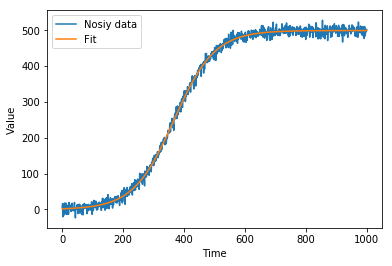

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 400], [0.03, 600])

# Perform an optimization with boundaries and hints
x0 = 0.01, 450
sigma0 = [0.01, 100]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    sigma0,
    boundaries,
    method=pints.CMAES
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()